 # Project Mile stone - 5

In [125]:
# 1) In this I have cleaned the all 3 sources (CSV,WEB and API) car data .
# 2) In next step created a tables in Sqlite database for each source and inserted data.
# 3) Merged all 3 tables into one Python dataframe
# 4) In next step created Visualization by joining the created tables data.  

In [1]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## CSV file Cleaning steps

In [2]:
df = pd.read_csv("USA_cars_datasets.csv")
df.head()


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [3]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [4]:
df.shape

(2499, 13)

In [5]:
# check for any NaN:

print("The column brand contains NaN - %r  " %df.brand.isnull().values.any())

print("The column model contains NaN - %r  " %df.model.isnull().values.any())

print("The column price contains NaN - %r  " %df.price.isnull().values.any())

print("The column mileage contains NaN - %r  " %df.mileage.isnull().values.any())

The column brand contains NaN - False  
The column model contains NaN - False  
The column price contains NaN - False  
The column mileage contains NaN - False  


In [6]:
# Drop unnecessary data 

drop_columns = ['Unnamed: 0', 'condition', 'vin', 'lot']
data = df.drop(drop_columns, axis = 1)
data.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa


In [7]:
# fins minimum values in all the collumns to see the data
data.min()

price                       0
brand                   acura
model                    1500
year                     1973
title_status    clean vehicle
mileage                   0.0
color                   beige
state                 alabama
country                canada
dtype: object

In [8]:
# We find that the min of price is 0 and we need to figure the rows out

data.loc[data['price'] < 500].head()

,price,brand,model,year,title_status,mileage,color,state,country
141,0,dodge,van,2008,salvage insurance,177948.0,orange,utah,usa
144,0,dodge,door,2014,salvage insurance,123660.0,silver,utah,usa
188,175,chrysler,door,2000,salvage insurance,231240.0,red,north carolina,usa
196,0,ford,mpv,2017,clean vehicle,76858.0,white,texas,usa
206,25,chevrolet,vehicl,2020,salvage insurance,7232.0,black,kentucky,usa


In [9]:
# drop the rows where price is not correct 

data = data.drop(data.loc[data['price'] == data['price'].min()].index)


In [10]:
data

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa
...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,california,usa
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,florida,usa
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,florida,usa
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,florida,usa


In [11]:
# Check all the columns for the bad data
for column in data.columns:
    print(ascii(data[column][0]))

6300
'toyota'
'cruiser'
2008
'clean vehicle'
274117.0
'black'
'new jersey'
' usa'


In [12]:
# Country column has an unnecessary space character
# will remove the space

data['country'] = data['country'].apply(lambda x:x.replace(" ", ""))
ascii(data['country'][1])

"'usa'"

In [13]:
data.shape

(2456, 9)

## Website data Cleaning steps

In [14]:
url=pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States')

In [15]:
state_df=url[1]

In [16]:
state_df

Flag, name andpostal abbreviation[13]  \
   Flag, name andpostal abbreviation[13]   
0                                Alabama   
1                                 Alaska   
2                                Arizona   
3                               Arkansas   
4                             California   
5                               Colorado   
6                            Connecticut   
7                               Delaware   
8                                Florida   
9                                Georgia   
10                                Hawaii   
11                                 Idaho   
12                              Illinois   
13                               Indiana   
14                                  Iowa   
15                                Kansas   
16                           Kentucky[D]   
17                             Louisiana   
18                                 Maine   
19                              Maryland   
20                      Massachusetts[D]   
21                              Michigan   
22                             Minnesota   
23                           Mississippi   
24                              Missouri   
25                               Montana   
26                              Nebraska   
27                                Nevada   
28                         New Hampshire   
29                            New Jersey   
30                            New Mexico   
31                              New York   
32                        North Carolina   
33                          North Dakota   
34                                  Ohio   
35                              Oklahoma   
36                                Oregon   
37                       Pennsylvania[D]   
38                          Rhode Island   
39                        South Carolina   
40                          South Dakota   
41                             Tennessee   
42                                 Texas   
43                                  Utah   
44                               Vermont   
45                           Virginia[D]   
46                            Washington   
47                         West Virginia   
48                             Wisconsin   
49                               Wyoming   

                                                    Cities                  \
   Flag, name andpostal abbreviation[13].1         Capital     Largest[17]   
0                                       AL      Montgomery      Huntsville   
1                                       AK          Juneau       Anchorage   
2                                       AZ         Phoenix         Phoenix   
3                                       AR     Little Rock     Little Rock   
4                                       CA      Sacramento     Los Angeles   
5                                       CO          Denver          Denver   
6                                       CT        Hartford      Bridgeport   
7                                       DE           Dover      Wilmington   
8                                       FL     Tallahassee    Jacksonville   
9                                       GA         Atlanta         Atlanta   
10                                      HI        Honolulu        Honolulu   
11                                      ID           Boise           Boise   
12                                      IL     Springfield         Chicago   
13                                      IN    Indianapolis    Indianapolis   
14                                      IA      Des Moines      Des Moines   
15                                      KS          Topeka         Wichita   
16                                      KY       Frankfort      Louisville   
17                                      LA     Baton Rouge     New Orleans   
18                                      ME         Augusta        Portland   
19                                      MD       Annapolis       Baltimore  

In [17]:
df = pd.DataFrame(state_df['Flag, name andpostal abbreviation[13]'][['Flag, name andpostal abbreviation[13]','Flag, name andpostal abbreviation[13].1',]])

In [18]:
# Replace Headers

df.columns = ['US_STATE_NAMES', 'US_STATE_SHORT_CODE']

In [19]:
# insert STATE_POPULATION in dataframe
df.insert(2, "STATE_POPULATION", state_df['Population[15]'], True)

In [20]:
# insert TOTAL_AREA_IN_MILES in dataframe
df.insert(3,"TOTAL_AREA_IN_MILES",state_df['Total area[16]']['mi2'],True)

In [21]:
df

,US_STATE_NAMES,US_STATE_SHORT_CODE,STATE_POPULATION,TOTAL_AREA_IN_MILES
0,Alabama,AL,5024279,52420
1,Alaska,AK,733391,665384
2,Arizona,AZ,7151502,113990
3,Arkansas,AR,3011524,53179
4,California,CA,39538223,163695
5,Colorado,CO,5773714,104094
6,Connecticut,CT,3605944,5543
7,Delaware,DE,989948,2489
8,Florida,FL,21538187,65758
9,Georgia,GA,10711908,59425


In [22]:
# Find Any outliners in STATE_POPULATION and TOTAL_AREA_IN_MILES
df.describe()[['STATE_POPULATION', 'TOTAL_AREA_IN_MILES']]

,STATE_POPULATION,TOTAL_AREA_IN_MILES
count,5.000000e+01,50.000000
mean,6.615195e+06,75933.520000
std,7.436143e+06,97327.408063
min,5.768510e+05,1545.000000
25%,1.869706e+06,37417.000000
50%,4.581796e+06,57093.500000
75%,7.566836e+06,84565.000000
max,3.953822e+07,665384.000000


In [23]:
#find duplicate rows across US_STATE_NAMES, STATE_POPULATION,TOTAL_AREA_IN_MILES
duplicateRows = df[df.duplicated(['US_STATE_NAMES', 'STATE_POPULATION', 'TOTAL_AREA_IN_MILES'])]

In [24]:
duplicateRows

,US_STATE_NAMES,US_STATE_SHORT_CODE,STATE_POPULATION,TOTAL_AREA_IN_MILES


In [25]:
# Data cleaning activity
# Delete unnecessary columns

In [26]:
df2=pd.DataFrame(state_df)

In [27]:
df2.drop(['Water area[16]','Numberof Reps.','Land area[16]','Land area[16]','Land area[16]','Ratification oradmission[C]','Cities'],axis=1)

C:\Users\nbaga\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Flag, name andpostal abbreviation[13]  \
   Flag, name andpostal abbreviation[13]   
0                                Alabama   
1                                 Alaska   
2                                Arizona   
3                               Arkansas   
4                             California   
5                               Colorado   
6                            Connecticut   
7                               Delaware   
8                                Florida   
9                                Georgia   
10                                Hawaii   
11                                 Idaho   
12                              Illinois   
13                               Indiana   
14                                  Iowa   
15                                Kansas   
16                           Kentucky[D]   
17                             Louisiana   
18                                 Maine   
19                              Maryland   
20                      Massachusetts[D]   
21                              Michigan   
22                             Minnesota   
23                           Mississippi   
24                              Missouri   
25                               Montana   
26                              Nebraska   
27                                Nevada   
28                         New Hampshire   
29                            New Jersey   
30                            New Mexico   
31                              New York   
32                        North Carolina   
33                          North Dakota   
34                                  Ohio   
35                              Oklahoma   
36                                Oregon   
37                       Pennsylvania[D]   
38                          Rhode Island   
39                        South Carolina   
40                          South Dakota   
41                             Tennessee   
42                                 Texas   
43                                  Utah   
44                               Vermont   
45                           Virginia[D]   
46                            Washington   
47                         West Virginia   
48                             Wisconsin   
49                               Wyoming   

                                           Population[15] Total area[16]  \
   Flag, name andpostal abbreviation[13].1 Population[15]            mi2   
0                                       AL        5024279          52420   
1                                       AK         733391         665384   
2                                       AZ        7151502         113990   
3                                       AR        3011524          53179   
4                                       CA       39538223         163695   
5                                       CO        5773714         104094   
6                                       CT        3605944           5543   
7                                       DE         989948           2489   
8                                       FL       21538187          65758   
9                                       GA       10711908          59425   
10                                      HI        1455271          10932   
11                                      ID        1839106          83569   
12                                      IL       12812508          57914   
13                                      IN        6785528          36420   
14                                      IA        3190369          56273   
15                                      KS        2937880          82278   
16                                      KY        4505836          40408   
17                                      LA        4657757          52378   
18                                      ME        1362359          35380   
19                                      MD        6177224          12406   
20                                      MA

In [28]:
# Missing values
df_cleaned = df2.dropna(how='all')

In [29]:
df_cleaned

Flag, name andpostal abbreviation[13]  \
   Flag, name andpostal abbreviation[13]   
0                                Alabama   
1                                 Alaska   
2                                Arizona   
3                               Arkansas   
4                             California   
5                               Colorado   
6                            Connecticut   
7                               Delaware   
8                                Florida   
9                                Georgia   
10                                Hawaii   
11                                 Idaho   
12                              Illinois   
13                               Indiana   
14                                  Iowa   
15                                Kansas   
16                           Kentucky[D]   
17                             Louisiana   
18                                 Maine   
19                              Maryland   
20                      Massachusetts[D]   
21                              Michigan   
22                             Minnesota   
23                           Mississippi   
24                              Missouri   
25                               Montana   
26                              Nebraska   
27                                Nevada   
28                         New Hampshire   
29                            New Jersey   
30                            New Mexico   
31                              New York   
32                        North Carolina   
33                          North Dakota   
34                                  Ohio   
35                              Oklahoma   
36                                Oregon   
37                       Pennsylvania[D]   
38                          Rhode Island   
39                        South Carolina   
40                          South Dakota   
41                             Tennessee   
42                                 Texas   
43                                  Utah   
44                               Vermont   
45                           Virginia[D]   
46                            Washington   
47                         West Virginia   
48                             Wisconsin   
49                               Wyoming   

                                                    Cities                  \
   Flag, name andpostal abbreviation[13].1         Capital     Largest[17]   
0                                       AL      Montgomery      Huntsville   
1                                       AK          Juneau       Anchorage   
2                                       AZ         Phoenix         Phoenix   
3                                       AR     Little Rock     Little Rock   
4                                       CA      Sacramento     Los Angeles   
5                                       CO          Denver          Denver   
6                                       CT        Hartford      Bridgeport   
7                                       DE           Dover      Wilmington   
8                                       FL     Tallahassee    Jacksonville   
9                                       GA         Atlanta         Atlanta   
10                                      HI        Honolulu        Honolulu   
11                                      ID           Boise           Boise   
12                                      IL     Springfield         Chicago   
13                                      IN    Indianapolis    Indianapolis   
14                                      IA      Des Moines      Des Moines   
15                                      KS          Topeka         Wichita   
16                                      KY       Frankfort      Louisville   
17                                      LA     Baton Rouge     New Orleans   
18                                      ME         Augusta        Portland   
19                                      MD       Annapolis       Baltimore  

In [30]:
#Columns which contains only NaN values

s = df2.isna().all()

In [31]:
df

,US_STATE_NAMES,US_STATE_SHORT_CODE,STATE_POPULATION,TOTAL_AREA_IN_MILES
0,Alabama,AL,5024279,52420
1,Alaska,AK,733391,665384
2,Arizona,AZ,7151502,113990
3,Arkansas,AR,3011524,53179
4,California,CA,39538223,163695
5,Colorado,CO,5773714,104094
6,Connecticut,CT,3605944,5543
7,Delaware,DE,989948,2489
8,Florida,FL,21538187,65758
9,Georgia,GA,10711908,59425


## API Data extraction and Cleaning Steps

In [32]:
import requests
import pandas as pd
import time

url = "https://car-data.p.rapidapi.com/cars"



In [34]:
### Get Unique Brand name from cars_sales CSV file to get the data from API source

udata= data['brand'].unique()
api_final =[]

# fecthing data in Loop to get data from API using cars csv file Brand

for index in range(len(udata)):

    querystring = {"limit":"50","page":"0","make":udata[index]}

    headers = {
        "X-RapidAPI-Key": "e6ee040b33mshe35556625eefcc7p1e0f5cjsn04a25ff6c4a5",
        "X-RapidAPI-Host": "car-data.p.rapidapi.com"
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    print(response.text)
    api_df=pd.read_json(response.text)
    api_df =api_df.rename(columns={col: "" for col in api_df})
    api_df = api_df.reset_index(drop=True)
    api_final.append(api_df)    
    time.sleep(5)

[{"id":9650,"year":2007,"make":"Toyota","model":"Tacoma Access Cab","type":"Pickup"},{"id":9669,"year":2004,"make":"Toyota","model":"4Runner","type":"SUV"},{"id":9709,"year":2009,"make":"Toyota","model":"FJ Cruiser","type":"SUV"},{"id":9750,"year":2018,"make":"Toyota","model":"Yaris","type":"Hatchback"},{"id":9780,"year":2004,"make":"Toyota","model":"Solara","type":"Coupe, Convertible"},{"id":9830,"year":2004,"make":"Toyota","model":"Land Cruiser","type":"SUV"},{"id":9855,"year":1998,"make":"Toyota","model":"T100 Xtracab","type":"Pickup"},{"id":9894,"year":2014,"make":"Toyota","model":"4Runner","type":"SUV"},{"id":9897,"year":1993,"make":"Toyota","model":"Xtra Cab","type":"Pickup"},{"id":9904,"year":2011,"make":"Toyota","model":"Tacoma Double Cab","type":"Pickup"},{"id":9906,"year":2014,"make":"Toyota","model":"Camry","type":"Sedan"},{"id":9907,"year":2014,"make":"Toyota","model":"Avalon","type":"Sedan"},{"id":9926,"year":2015,"make":"Toyota","model":"4Runner","type":"SUV"},{"id":9934,

In [35]:
len(api_final)

28

In [36]:
api_final

[                                                               
 0    9650  2007  Toyota   Tacoma Access Cab              Pickup
 1    9669  2004  Toyota             4Runner                 SUV
 2    9709  2009  Toyota          FJ Cruiser                 SUV
 3    9750  2018  Toyota               Yaris           Hatchback
 4    9780  2004  Toyota              Solara  Coupe, Convertible
 5    9830  2004  Toyota        Land Cruiser                 SUV
 6    9855  1998  Toyota        T100 Xtracab              Pickup
 7    9894  2014  Toyota             4Runner                 SUV
 8    9897  1993  Toyota            Xtra Cab              Pickup
 9    9904  2011  Toyota   Tacoma Double Cab              Pickup
 10   9906  2014  Toyota               Camry               Sedan
 11   9907  2014  Toyota              Avalon               Sedan
 12   9926  2015  Toyota             4Runner                 SUV
 13   9934  2002  Toyota   Tacoma Double Cab              Pickup
 14   9950  2004  Toyota 

In [37]:
df_final = pd.DataFrame()
for i in range(len(api_final)):
    #print(api_final[i])
    df_final=pd.concat([df_final,api_final[i]],ignore_index=True)
    print(df_final)

                                                               
0    9650  2007  Toyota   Tacoma Access Cab              Pickup
1    9669  2004  Toyota             4Runner                 SUV
2    9709  2009  Toyota          FJ Cruiser                 SUV
3    9750  2018  Toyota               Yaris           Hatchback
4    9780  2004  Toyota              Solara  Coupe, Convertible
5    9830  2004  Toyota        Land Cruiser                 SUV
6    9855  1998  Toyota        T100 Xtracab              Pickup
7    9894  2014  Toyota             4Runner                 SUV
8    9897  1993  Toyota            Xtra Cab              Pickup
9    9904  2011  Toyota   Tacoma Double Cab              Pickup
10   9906  2014  Toyota               Camry               Sedan
11   9907  2014  Toyota              Avalon               Sedan
12   9926  2015  Toyota             4Runner                 SUV
13   9934  2002  Toyota   Tacoma Double Cab              Pickup
14   9950  2004  Toyota   Tacoma Double 

In [38]:
df_final

,,,,,
0,9650,2007,Toyota,Tacoma Access Cab,Pickup
1,9669,2004,Toyota,4Runner,SUV
2,9709,2009,Toyota,FJ Cruiser,SUV
3,9750,2018,Toyota,Yaris,Hatchback
4,9780,2004,Toyota,Solara,"Coupe, Convertible"
...,...,...,...,...,...
1233,11342,1997,MAZDA,Millenia,Sedan
1234,11389,2003,MAZDA,B-Series Cab Plus,Pickup
1235,11417,2004,MAZDA,MAZDA3,"Sedan, Hatchback"
1236,11447,1994,MAZDA,MX-5 Miata,Convertible


In [39]:
#STEP-1
# Replace Headers

df_final.columns = ['ID','YEAR','MAKE','MODEL','TYPE']


In [40]:
df_final

,ID,YEAR,MAKE,MODEL,TYPE
0,9650,2007,Toyota,Tacoma Access Cab,Pickup
1,9669,2004,Toyota,4Runner,SUV
2,9709,2009,Toyota,FJ Cruiser,SUV
3,9750,2018,Toyota,Yaris,Hatchback
4,9780,2004,Toyota,Solara,"Coupe, Convertible"
...,...,...,...,...,...
1233,11342,1997,MAZDA,Millenia,Sedan
1234,11389,2003,MAZDA,B-Series Cab Plus,Pickup
1235,11417,2004,MAZDA,MAZDA3,"Sedan, Hatchback"
1236,11447,1994,MAZDA,MX-5 Miata,Convertible


## Insert all 3 source Data into Sqlite database

In [76]:
import sqlite3
from sqlite3 import Error

In [77]:
# Create table fucntion

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

In [78]:
# Database connection function
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)

    return conn

## Create statement for cars table from CSV file

In [79]:

sql_create_cars_table = """
CREATE TABLE if not exists cars_price (
    price real NOT NULL,
	brand text NOT NULL,
	model text NOT NULL,
    year integer NOT NULL,
    title_status text NOT NULL,
    mileage real NOT NULL,
    color text NOT NULL,
    state text NOT NULL,
    country text NOT NULL
);"""

## Create statement for State table from website

In [55]:
sql_create_state_table = """
CREATE TABLE if not exists usa_state (
    US_STATE_NAMES text NOT NULL,
	US_STATE_SHORT_CODE text NOT NULL,
	STATE_POPULATION integer NOT NULL,
    TOTAL_AREA_IN_MILES real NOT NULL
   
);"""

## Create statement for cars model table from API

In [56]:
sql_create_carmodels_table = """
CREATE TABLE if not exists carmodels_type (
    ID integer NOT NULL,
	YEAR integer NOT NULL,
	MAKE text NOT NULL,
    MODEL text NOT NULL,
    TYPE text NOT NULL
   
);"""

In [80]:
#import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
# create a database connection
database = r"pythonsqlite1.db"
conn = create_connection(database)


  

In [84]:
# Check Dataabase connection and insert data into cars_price table
if conn is not None:
    # create projects table
    create_table(conn, sql_create_cars_table)


for index, row in data.iterrows():
    conn.execute("INSERT INTO cars_price (price, brand, model,year,title_status,mileage,color,state,country) values(?,?,?,?,?,?,?,?,?)", (row.price, row.brand, row.model, row.year, row.title_status, row.mileage, row.color, row.state, row.country))


In [85]:
# Check Dataabase connection and insert data into usa_states table
if conn is not None:
    # create projects table
    create_table(conn, sql_create_state_table)

for index, row in df.iterrows():
    conn.execute("INSERT INTO usa_state (US_STATE_NAMES, US_STATE_SHORT_CODE, STATE_POPULATION,TOTAL_AREA_IN_MILES) values(?,?,?,?)", (row.US_STATE_NAMES, row.US_STATE_SHORT_CODE, row.STATE_POPULATION, row.TOTAL_AREA_IN_MILES))


In [86]:
# Check Dataabase connection and insert data into carmodels_type table
if conn is not None:
    # create projects table
    create_table(conn, sql_create_carmodels_table)

for index, row in df_final.iterrows():
    conn.execute("INSERT INTO carmodels_type (ID, YEAR, MAKE,MODEL,TYPE) values(?,?,?,?,?)", (row.ID, row.YEAR, row.MAKE, row.MODEL, row.TYPE))



## Merge all three Data sets into one DataFrame

In [129]:
merged_df = pd.DataFrame()
merged_df=conn.execute("select price,carmodel_type.MAKE as brand, model,year,title_status,mileage,color,usa_state.US_STATE_NAMES AS state,country,US_STATE_SHORT_CODE, STATE_POPULATION,TOTAL_AREA_IN_MILES  FROM cars_price JOIN usa_state ON UPPER(cars_price.state)=UPPER(usa_state.US_STATE_NAMES) JOIN (Select distinct MAKE FROM carmodels_type) carmodel_type ON UPPER(carmodel_type.MAKE) = UPPER(cars_price.brand)")

cols = [column[0] for column in merged_df.description]
final_merged_df= pd.DataFrame.from_records(data = merged_df.fetchall(), columns = cols)

In [130]:
final_merged_df

,price,brand,model,year,title_status,mileage,color,state,country,US_STATE_SHORT_CODE,STATE_POPULATION,TOTAL_AREA_IN_MILES
0,6300.0,Toyota,cruiser,2008,clean vehicle,274117.0,black,New Jersey,usa,NJ,9288994,8723.0
1,2899.0,Ford,se,2011,clean vehicle,190552.0,silver,Tennessee,usa,TN,6910840,42144.0
2,5350.0,Dodge,mpv,2018,clean vehicle,39590.0,silver,Georgia,usa,GA,10711908,59425.0
3,27700.0,Chevrolet,1500,2018,clean vehicle,6654.0,red,Florida,usa,FL,21538187,65758.0
4,5700.0,Dodge,mpv,2018,clean vehicle,45561.0,white,Texas,usa,TX,29145505,268596.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4035,7800.0,Nissan,versa,2019,clean vehicle,23609.0,red,California,usa,CA,39538223,163695.0
4036,9200.0,Nissan,versa,2018,clean vehicle,34553.0,silver,Florida,usa,FL,21538187,65758.0
4037,9200.0,Nissan,versa,2018,clean vehicle,31594.0,silver,Florida,usa,FL,21538187,65758.0
4038,9200.0,Nissan,versa,2018,clean vehicle,32557.0,black,Florida,usa,FL,21538187,65758.0


## Visualization

<BarContainer object of 28 artists>

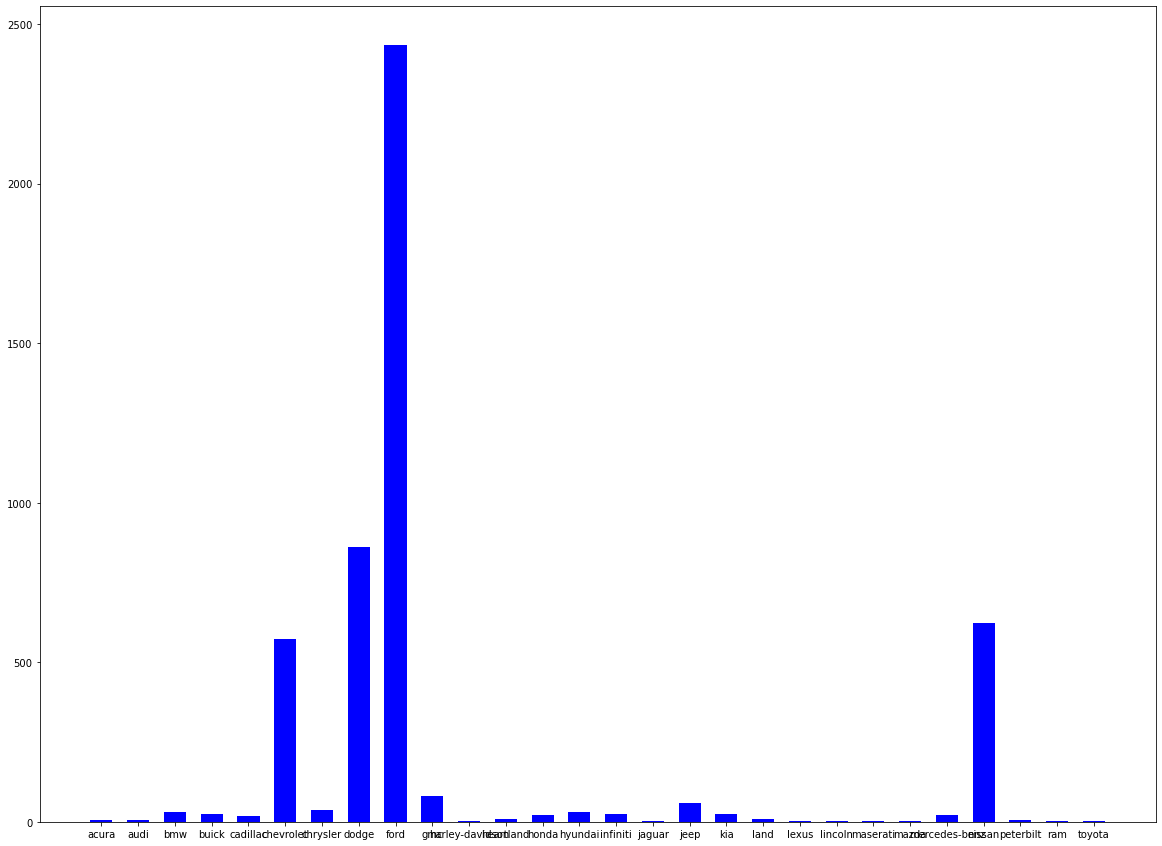

In [87]:
# Plot to check the which brand cars are more in the market for sale
x_axis=[]
y_axis=[]
for num_car,brand in  conn.execute('''select count(1),brand from cars_price group by brand'''):
    x_axis.append(brand)
    y_axis.append(num_car)

fig = plt.figure(figsize = (20, 15)) 
# creating the bar plot
plt.bar(x_axis, y_axis, color ='Blue',width = 0.6)  

<BarContainer object of 28 artists>

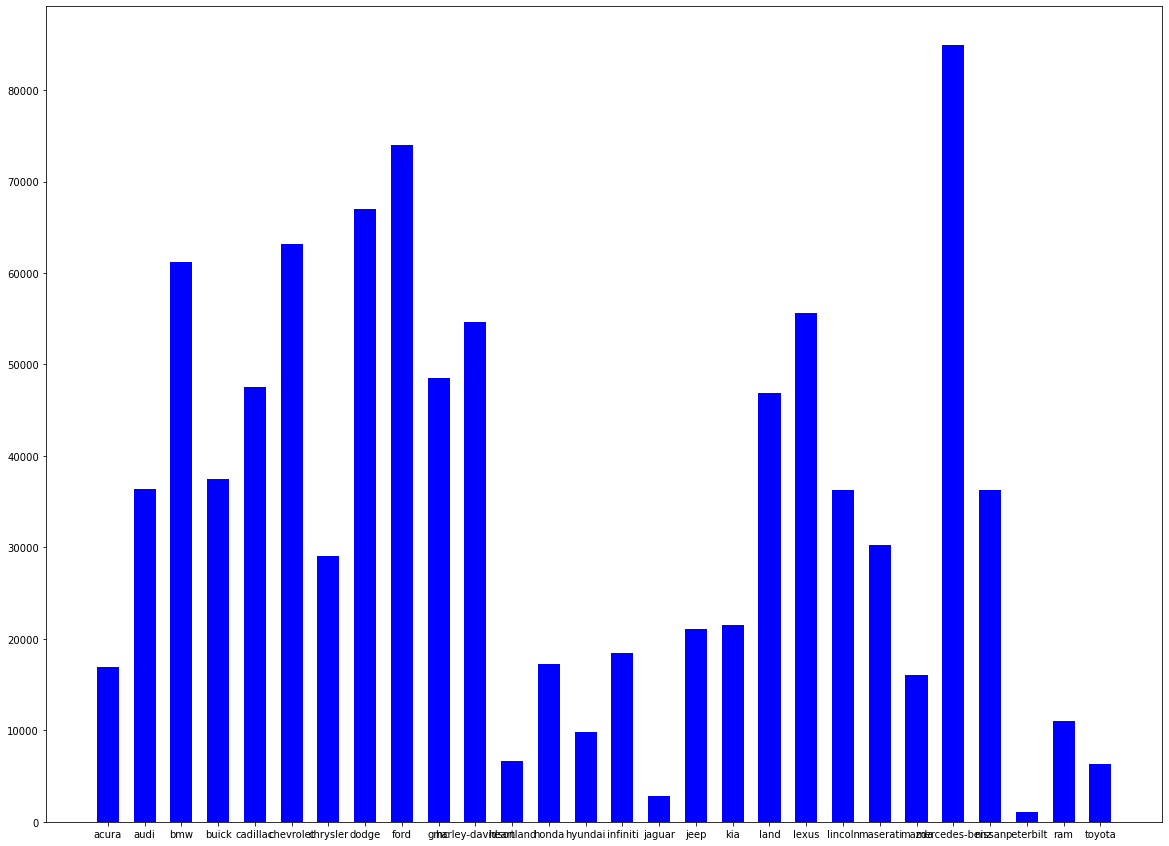

In [88]:
# Plot to check the which brand cars are seeling for heightest price
x_axis=[]
y_axis=[]
for mprice,brand in  conn.execute('''select max(price),brand from cars_price group by brand'''):
    x_axis.append(brand)
    y_axis.append(mprice)

fig = plt.figure(figsize = (20, 15)) 
# creating the bar plot
plt.bar(x_axis, y_axis, color ='Blue',width = 0.6)  

<AxesSubplot:>

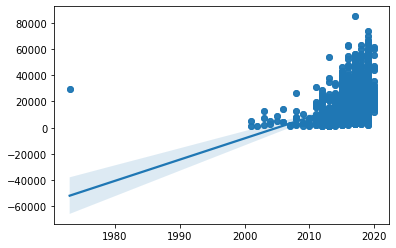

In [95]:
# scatter Plot to check distribution of prices by year of cars making
x_axis=[]
y_axis=[]
for mprice,year in  conn.execute("select price, year FROM cars_price where price >1000"):
    x_axis.append(year)
    y_axis.append(mprice)

sns.regplot(x=x_axis, y=y_axis)

<BarContainer object of 38 artists>

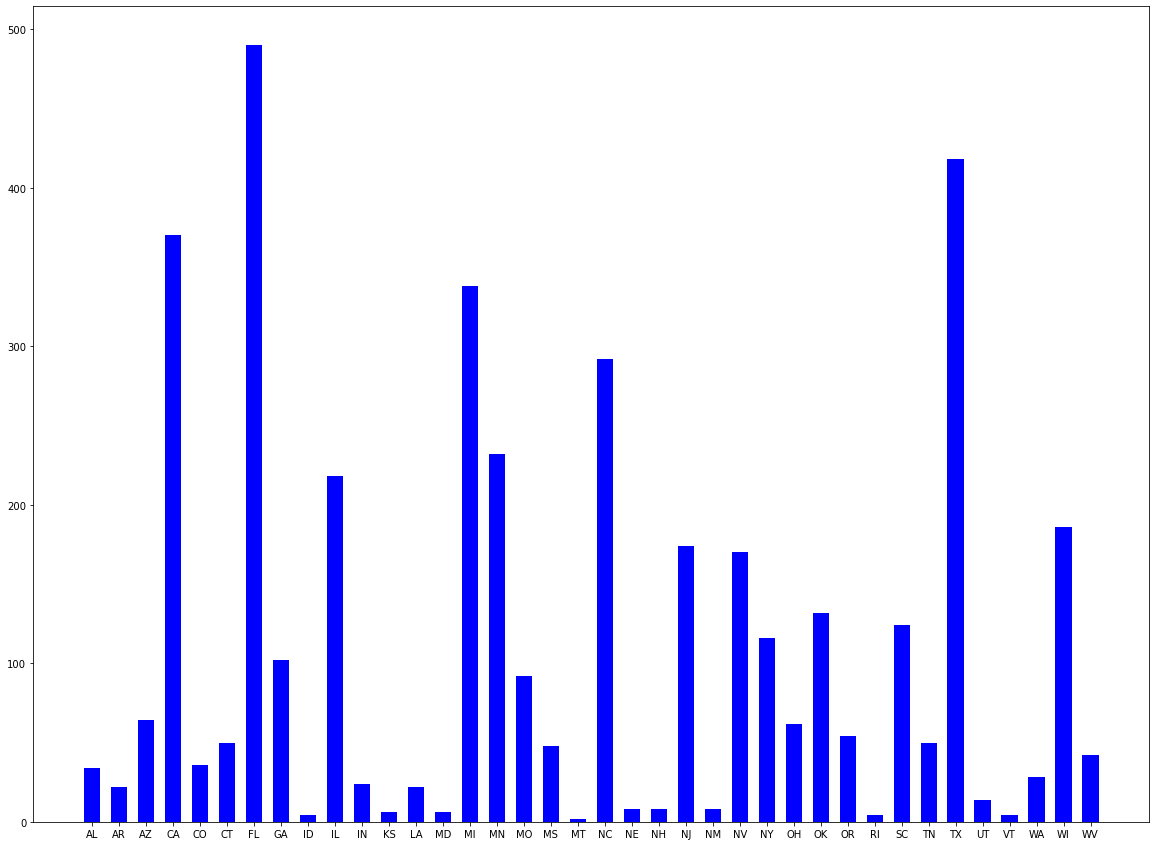

In [99]:
# Statewise cars for sale
# join to get the usa_state table for state_short_codes
x_axis=[]
y_axis=[]
for shrt_st_cde,num_cars in  conn.execute("select usa_state.US_STATE_SHORT_CODE,count(*) FROM cars_price JOIN usa_state ON UPPER(cars_price.state)=UPPER(usa_state.US_STATE_NAMES) group by usa_state.US_STATE_SHORT_CODE"):
    x_axis.append(shrt_st_cde)
    y_axis.append(num_cars)

fig = plt.figure(figsize = (20, 15)) 
# creating the bar plot
plt.bar(x_axis, y_axis, color ='Blue',width = 0.6) 

In [132]:
# Join 3 tables to see the number of cars on sale of each model by each sate

import plotly.express as px
df_cars_final = pd.DataFrame()
query=conn.execute("select carmodel_type.make as make,count(*) as num_cars,usa_state.US_STATE_SHORT_CODE as State_code  FROM cars_price JOIN usa_state ON UPPER(cars_price.state)=UPPER(usa_state.US_STATE_NAMES) JOIN (Select distinct MAKE FROM carmodels_type) carmodel_type ON UPPER(carmodel_type.MAKE) = UPPER(cars_price.brand) group by usa_state.US_STATE_SHORT_CODE,carmodel_type.MAKE")

cols = [column[0] for column in query.description]
results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)    

fig = px.bar(results, x="make", y="num_cars", color="State_code", title="Number of cars On Sale by state and model")
fig.show()

# 250-500-word summary of what you learned and had to do to complete the project.

*** In this project, from Project milestone 1 to Project milestone 5, I got very good hands-on Python coding and learned types of Issues we face during data cleaning activity, during this tenure selecting 3 different types of data sets was a big challenge, It was difficult to search through the internet for the right datasets, another challenge is to find the bad data like NaNs, text data In numeric fileds and vice versa, missing values and null values, at one point of time and also it became the biggest Challenge to extract useful data from all 3 sources. 

Being a data engineer, I have hands on data but, we always deal with the cleaned data, but this project helped me to understand different data sets and helped to understand the complications in filtering the data from web, this is the first time I have ever used a website (Wikipedia) to read the data, this project gave me so much confidence to step forward in data science field. 

Most importantly, I have learned how to use different types of visualization, for different types of data, Python libraries (metplot, plotly, seaborn) are extremely useful in generating the Visualizations and understand the data, also visualization is useful in finding the outliners, I have used united states car data in my project, different forums on data science were especially useful in finding the right solution for data cleanup.  

During this course I also learned how to load data in python data frames and do slice and dice, particularly merging the data sets and inserting them into SQLITE was a good learning for me. 

When it comes to the ethical consideration of beneficence refers to the “be of benefit, do no harm”. Ethical Consideration when collecting data refers to a System of principles that can critically change past considerations about choices and actions. One should always preserve privacy in a way that users and the public will find acceptable when dealing with datasets like healthcare, also should ensure that data are used in such a way as to benefit the public and reassure the integrity of organizations. ***